## Random forest

In [102]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [103]:
df = pd.read_csv("../data_cleaned/cleaned_dataset.csv")

df.head(10)

,Bags_amount,Harvest_year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,...,Total_cup_points,Moisture,Category_one_defects,Quakers,Category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Region_Label,Sort_type
0,300,2014.0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,...,90.58,0.12,0,0.0,0,1950.00,2200.0,2075.00,0,0
1,300,2014.0,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,...,89.92,0.12,0,0.0,1,1950.00,2200.0,2075.00,0,0
2,5,2013.0,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.0,...,89.75,0.00,0,0.0,0,1600.00,1800.0,1700.00,2,0
3,320,2014.0,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,...,89.00,0.11,0,0.0,2,1800.00,2200.0,2000.00,0,0
4,300,2014.0,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,...,88.83,0.12,0,0.0,2,1950.00,2200.0,2075.00,0,0
5,100,2013.0,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.0,...,88.83,0.11,0,0.0,1,1310.64,1350.0,1310.64,6,0
6,100,2012.0,8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.0,...,88.75,0.11,0,0.0,0,1310.64,1350.0,1310.64,6,0
7,300,2013.0,8.25,8.33,8.50,8.42,8.33,8.50,10.00,10.0,...,88.67,0.03,0,0.0,0,1570.00,1700.0,1635.00,0,0
8,300,2013.0,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10.0,...,88.42,0.03,0,0.0,0,1570.00,1700.0,1635.00,0,0
9,50,2014.0,8.08,8.58,8.50,8.50,7.67,8.42,10.00,10.0,...,88.25,0.10,0,0.0,4,1795.00,1850.0,1822.50,0,0


### Random forest regression

In [104]:
# Imports to make regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
# Setting target variable (y) to be the quality_score column and x is the rest of the columns as input variables
X = df.drop(columns=["Total_cup_points"])
y = df["Total_cup_points"]

In [106]:
# Using the train_test_split from sklearn to split into training and test sets
# 80 % is training data and 20 % is test data. 
# The training data is used to build the model and the test data is used to evaluate if the model performs well.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Creates a random with a 100 trees.
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Uses the training data to fit and build the model.
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
# Predicitons for the target variable (y) coffee_quality column.
# It uses the test data on the model to predict coffee_quality score. 
y_pred = model.predict(X_test)

#### Measurements

We can use different measurement teqniques to evalute our model. For regression we typically use mean squared error (MSE), r2 score.
The MSE calcautes the average squared difference between the predicted y (y_pred) and the actual value of y. So it essensially tells us how far away our predicted value of y is away from the real value of y, in average. The smaller the value in y is, the smaller the difference is. 
The r2 score calculates how much of the variance in the data that can be explained. A score close to 1 in this case is good and closer to 0 means that the variance cannot be explained.
source: https://medium.com/@wl8380/title-building-a-linear-regression-model-with-mse-and-r-squared-in-python-9df41472cf04



In [109]:
# Measurements

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 15.81
R² Score: 0.50


##### Evalutation of model
Mean squared error is 0.57 which is not all that good. 
The r2 score i 0.93 which is close to one and therefor the variance in the data can be explained. 



##### Model feature importance

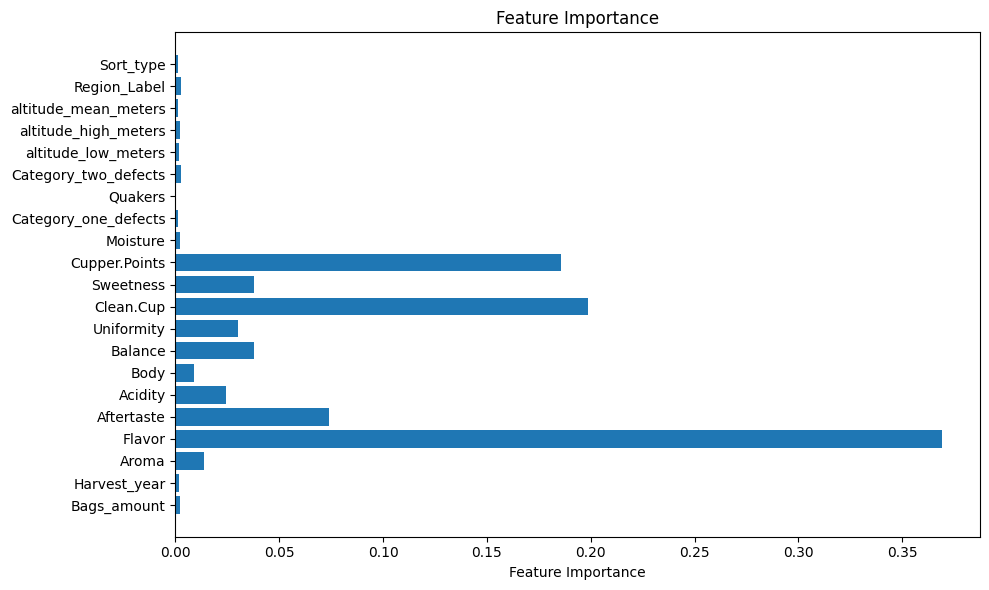

In [110]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

# Plot that shows which features are most important for prediciting the outcome of coffee_quality
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [111]:
# To try and make our model better we can further drop some input varibales like Category Two Defects and Moisture that isnt that important

X = df.drop(columns=["Sort_type", "Region_Label", "altitude_mean_meters", "altitude_high_meters", "altitude_low_meters", "Harvest_year", "Bags_amount", 'Quakers', 'Category_one_defects', 'Category_two_defects'])
y = df["Total_cup_points"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 15.80
R² Score: 0.50


In [112]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

df = pd.read_csv("../data_cleaned/cleaned_dataset.csv")  
X = df.drop(columns='Total_cup_points')      
y = df['Total_cup_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

selector = RFE(estimator=model, n_features_to_select=10)  
selector = selector.fit(X_train, y_train)

# In short, RFE selects features by iteratively removing the least important ones based on model performance, until the specified number of features remains.
selected_features = X_train.columns[selector.support_]
print(f"Features: {selected_features}")

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

print("R² Score:", r2_score(y_test, y_pred))


Features: Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points'],
      dtype='object')
R² Score: 0.4916537039545271


We do get a slightly better evaluation by removing category two defects and moisture. Not that much in r2 score but in MSE we do. 

#### Random forest classification 

Since the target variable is contionus data, we cant make classification straight forward. We do need to somehow break the contionus data into categories, which we will do in order to make a random forest classification. We will define the quality as following:

Very low: 0 to 80

Low: 80 to 85

Medium: 85 to 90

High: 90 to 100

In [113]:
# Getting the dataset again

df_class = pd.read_csv("../data_cleaned/cleaned_dataset.csv")

df_class.head(10)

,Bags_amount,Harvest_year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,...,Total_cup_points,Moisture,Category_one_defects,Quakers,Category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Region_Label,Sort_type
0,300,2014.0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,...,90.58,0.12,0,0.0,0,1950.00,2200.0,2075.00,0,0
1,300,2014.0,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,...,89.92,0.12,0,0.0,1,1950.00,2200.0,2075.00,0,0
2,5,2013.0,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.0,...,89.75,0.00,0,0.0,0,1600.00,1800.0,1700.00,2,0
3,320,2014.0,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,...,89.00,0.11,0,0.0,2,1800.00,2200.0,2000.00,0,0
4,300,2014.0,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,...,88.83,0.12,0,0.0,2,1950.00,2200.0,2075.00,0,0
5,100,2013.0,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.0,...,88.83,0.11,0,0.0,1,1310.64,1350.0,1310.64,6,0
6,100,2012.0,8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.0,...,88.75,0.11,0,0.0,0,1310.64,1350.0,1310.64,6,0
7,300,2013.0,8.25,8.33,8.50,8.42,8.33,8.50,10.00,10.0,...,88.67,0.03,0,0.0,0,1570.00,1700.0,1635.00,0,0
8,300,2013.0,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10.0,...,88.42,0.03,0,0.0,0,1570.00,1700.0,1635.00,0,0
9,50,2014.0,8.08,8.58,8.50,8.50,7.67,8.42,10.00,10.0,...,88.25,0.10,0,0.0,4,1795.00,1850.0,1822.50,0,0


In [114]:
# Creating the bins for the category
bins = [0, 80, 85, 90, 100]
labels = ["Very Low", "Low", "Medium", "High"]

df_class["quality_category"] = pd.cut(df_class["Total_cup_points"], bins=bins, labels=labels, right=False)

print(df_class[["Total_cup_points", "quality_category"]].head(10))

   Total_cup_points quality_category
0             90.58             High
1             89.92           Medium
2             89.75           Medium
3             89.00           Medium
4             88.83           Medium
5             88.83           Medium
6             88.75           Medium
7             88.67           Medium
8             88.42           Medium
9             88.25           Medium


In [115]:
# Target variable as the category column just created and the rest is input variables (x)
X = df_class.drop(columns=["Total_cup_points", "quality_category"])
y = df_class["quality_category"]

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [117]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier with a 100 trees.
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate the model by getting a classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

         Low       0.94      0.98      0.96       214
      Medium       0.83      0.75      0.79        20
    Very Low       0.93      0.76      0.84        34

    accuracy                           0.93       268
   macro avg       0.90      0.83      0.86       268
weighted avg       0.93      0.93      0.93       268



The accuracy of the model is 0.95 which is very good. It means that the models performs well when trying to predict the category.

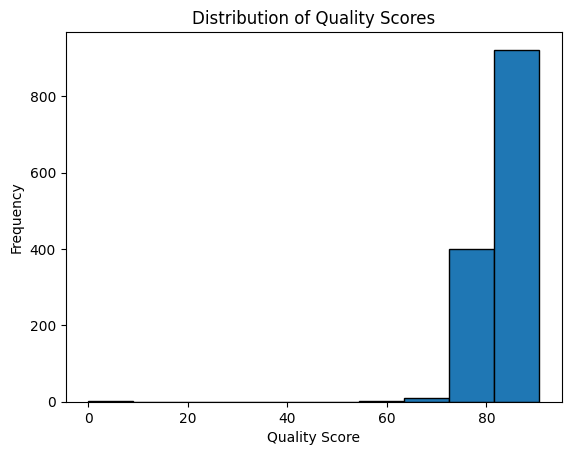

In [118]:
plt.hist(df['Total_cup_points'], bins=10, edgecolor='k')
plt.title("Distribution of Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.show()